Teleportation Measurement Results: {'011': 125, '110': 115, '100': 119, '001': 120, '101': 158, '000': 131, '111': 139, '010': 117}


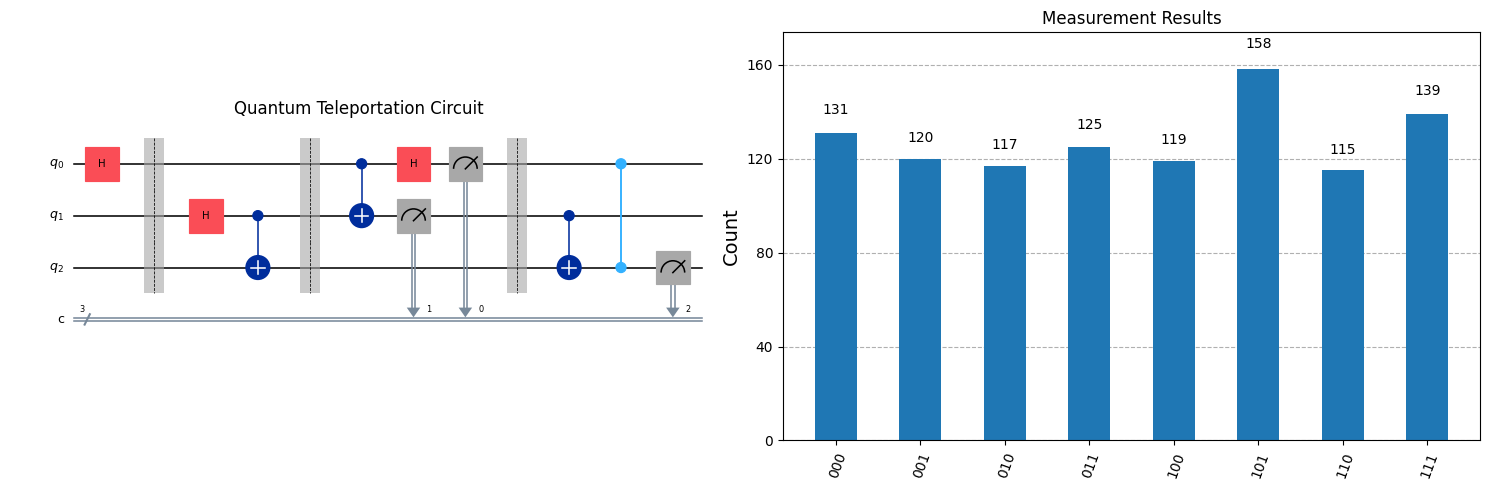

In [2]:
# Quantum Teleportation Protocol - Qiskit 2024+ Compatible
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Step 1: Create a 3-qubit circuit
qc = QuantumCircuit(3, 3)

# Step 2: Prepare qubit to teleport
qc.h(0)
qc.barrier()

# Step 3: Entangle q1 (Alice) & q2 (Bob)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Step 4: Alice's Bell measurement
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
qc.barrier()

# Step 5: Bob applies conditional operations
qc.cx(1, 2)
qc.cz(0, 2)

# Step 6: Measure Bob’s qubit
qc.measure(2, 2)

# Step 7: Simulate
sim = AerSimulator()
job = sim.run(qc)
result = job.result()
counts = result.get_counts()

# Step 8: Display results
print("Teleportation Measurement Results:", counts)

# Visualization
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
qc.draw('mpl', ax=ax1)
ax1.set_title('Quantum Teleportation Circuit')
plot_histogram(counts, ax=ax2)
ax2.set_title('Measurement Results')
plt.tight_layout()
plt.show()


Teleportation Measurement Results: {'0 10': 132, '0 01': 128, '1 01': 132, '1 11': 113, '1 10': 143, '1 00': 132, '0 00': 127, '0 11': 117}


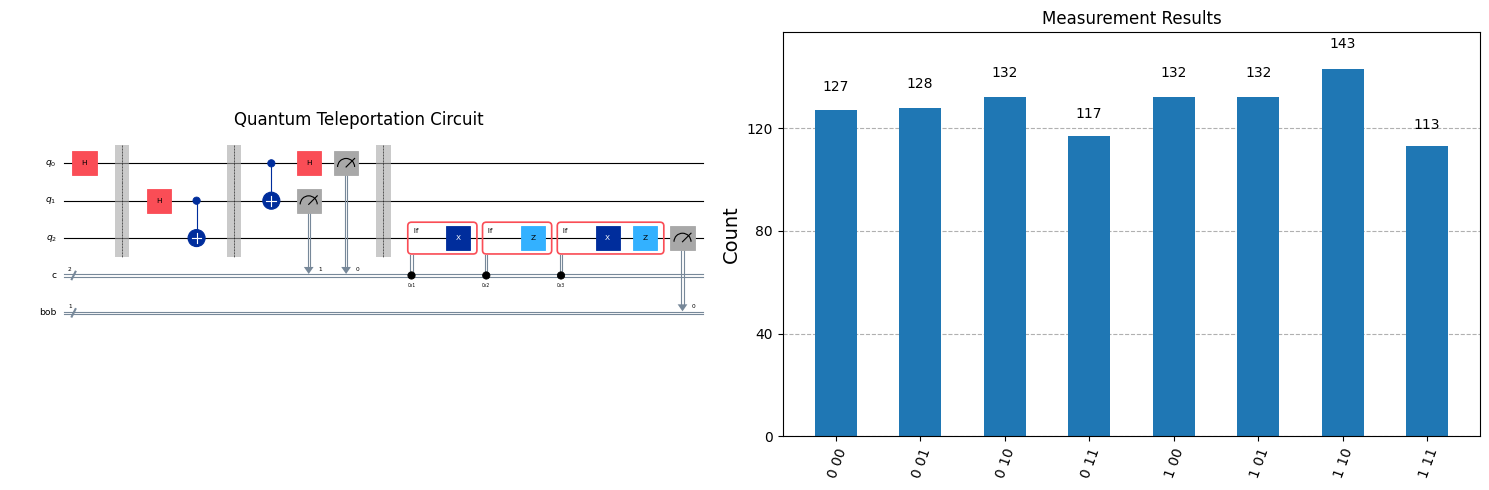

In [13]:
# PRAVEENA ANAND - Quantum Teleportation Protocol (Qiskit 2024+)

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Create Quantum and Classical Registers
# --------------------------
q = QuantumRegister(3, "q")          # q0: state, q1: Alice, q2: Bob
c_alice = ClassicalRegister(2, "c") # For Alice's Bell measurement
c_bob = ClassicalRegister(1, "bob") # For Bob's final measurement
qc = QuantumCircuit(q, c_alice, c_bob)

# --------------------------
# Step 2: Prepare state to teleport (example: superposition)
# --------------------------
qc.h(q[0])  # |ψ> = (|0> + |1>)/√2
qc.barrier()

# --------------------------
# Step 3: Entangle q1 (Alice) and q2 (Bob)
# --------------------------
qc.h(q[1])
qc.cx(q[1], q[2])
qc.barrier()

# --------------------------
# Step 4: Alice's Bell measurement
# --------------------------
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure([q[0], q[1]], [c_alice[0], c_alice[1]])
qc.barrier()

# --------------------------
# Step 5: Bob applies conditional corrections
# --------------------------
# Use modern Qiskit if_test syntax
with qc.if_test((c_alice, 1)):
    qc.x(q[2])
with qc.if_test((c_alice, 2)):
    qc.z(q[2])
with qc.if_test((c_alice, 3)):
    qc.x(q[2])
    qc.z(q[2])

# --------------------------
# Step 6: Measure Bob’s qubit
# --------------------------
qc.measure(q[2], c_bob[0])

# --------------------------
# Step 7: Simulation
# --------------------------
sim = AerSimulator()
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# --------------------------
# Step 8: Display results
# --------------------------
print("Teleportation Measurement Results:", counts)

# Visualization: Circuit + Histogram
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
qc.draw('mpl', ax=ax1)
ax1.set_title('Quantum Teleportation Circuit')
plot_histogram(counts, ax=ax2)
ax2.set_title('Measurement Results')
plt.tight_layout()
plt.show()
